# Exploratory Data Analysis

Exploratory Data Analysis on general dataset of historical customer purchases up to September 21st, 2025.

`train_df`: labeled dataset for training and evaluation

`test_df`: unlabeled dataset for final evaluation 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from datetime import datetime

DATA_COLLECTED_AT = datetime(2025, 9, 21).date()
NOTEBOOK_DIR = Path.cwd()
DATA_DIR = NOTEBOOK_DIR / "../datasets/customer_purchases"

def read_csv(filename: str):
    file = DATA_DIR / f"{filename}.csv"
    df = pd.read_csv(file)
    return df

# training data
train_df = read_csv("customer_purchases_train")

# final test data (no labels)
test_df = read_csv("customer_purchases_test")

---

## General Information

In [2]:
# General information about columns

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             7289 non-null   int64  
 1   customer_id             7289 non-null   object 
 2   customer_date_of_birth  7289 non-null   object 
 3   customer_gender         5738 non-null   object 
 4   customer_signup_date    7289 non-null   object 
 5   item_id                 7289 non-null   object 
 6   item_title              7289 non-null   object 
 7   item_category           7289 non-null   object 
 8   item_price              7289 non-null   float64
 9   item_img_filename       7289 non-null   object 
 10  item_avg_rating         7244 non-null   float64
 11  item_num_ratings        7289 non-null   int64  
 12  item_release_date       7289 non-null   object 
 13  purchase_timestamp      7289 non-null   object 
 14  customer_item_views     7289 non-null   

In [3]:
# General stadistics

print(train_df.describe())

       purchase_id   item_price  item_avg_rating  item_num_ratings  \
count  7289.000000  7289.000000      7244.000000       7289.000000   
mean   3843.890108  1319.936581         3.509974         31.512690   
std    2210.606540   663.925169         0.276164         19.163263   
min       0.000000   104.170000         2.480000          0.000000   
25%    1907.000000   778.050000         3.370000         17.000000   
50%    3890.000000  1294.960000         3.500000         31.000000   
75%    5772.000000  1554.720000         3.630000         44.000000   
max    7614.000000  2998.640000         5.000000         93.000000   

       customer_item_views  purchase_item_rating   label  
count          7289.000000           1544.000000  7289.0  
mean              4.945397              4.104598     1.0  
std               2.250023              0.692688     0.0  
min               1.000000              2.000000     1.0  
25%               3.000000              3.500000     1.0  
50%            

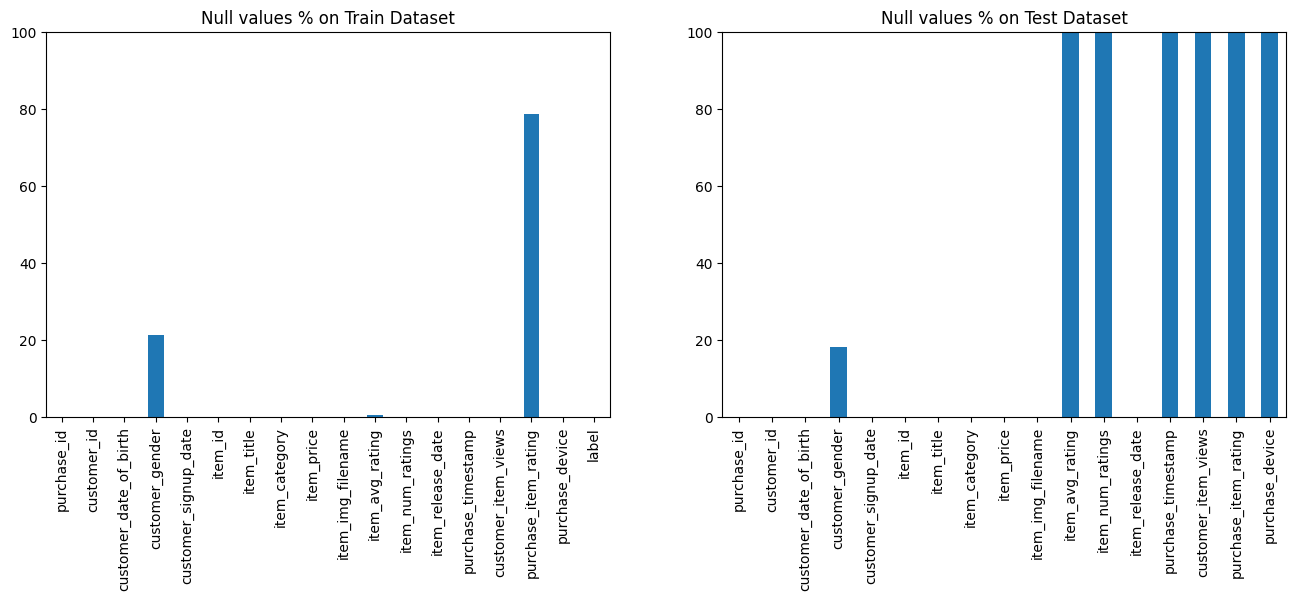

In [4]:
# Percentage of null values per column

train_null_pct = train_df.isnull().sum() / len(train_df) * 100
test_null_pct = test_df.isnull().sum() / len(test_df) * 100

fig, axes = plt.subplots(1, 2, figsize=(8*2, 5))

train_null_pct.plot(
    kind='bar',
    ax=axes[0],
    ylim=(0, 100),
    title="Null values % on Train Dataset"
)

test_null_pct.plot(
    kind='bar',
    ax=axes[1],
    ylim=(0, 100),
    title="Null values % on Test Dataset"
)

plt.show()

---

## Product Sales

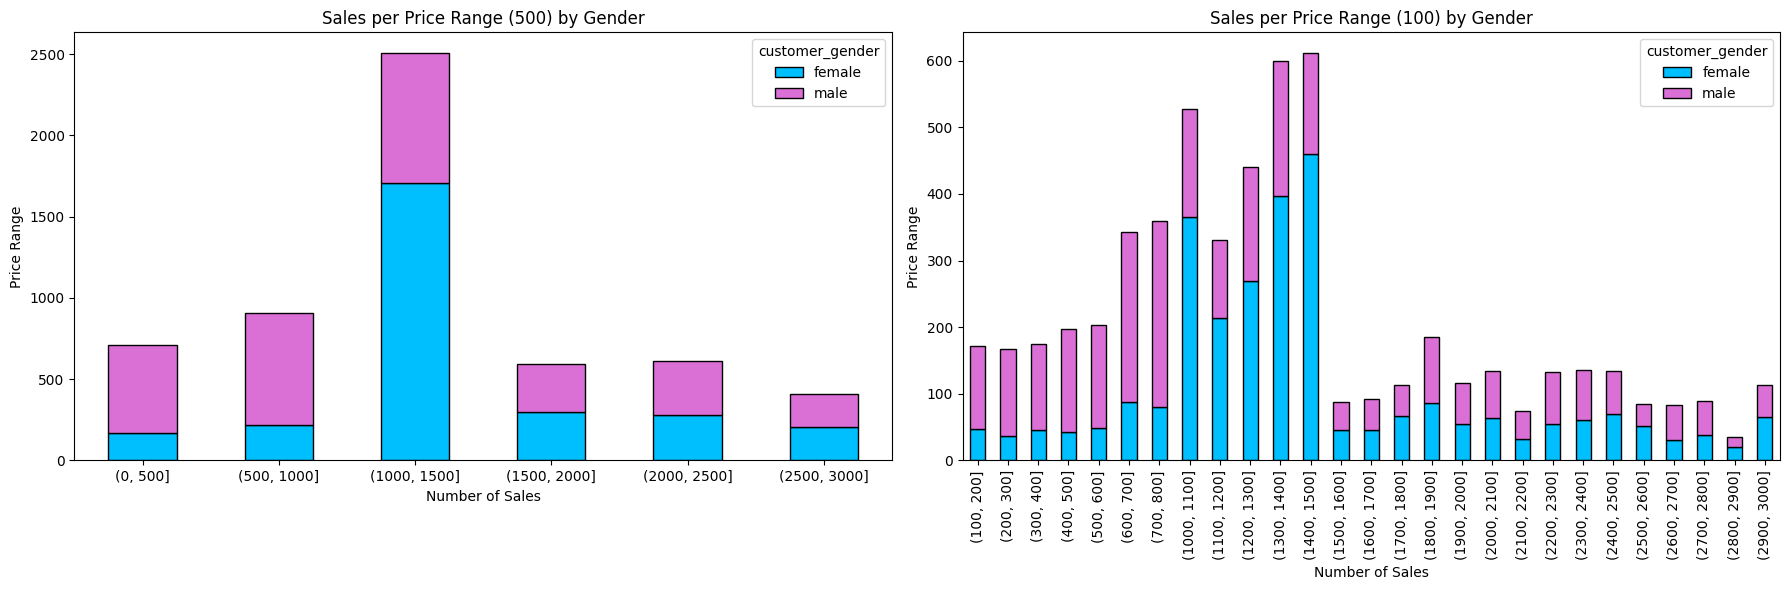

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))  # 1 row, 2 columns

# --- Bins of 500 ---
bin_width_500 = 500
bins_500 = range(0, int(train_df["item_price"].max()) + bin_width_500, bin_width_500)
train_df["price_range_500"] = pd.cut(train_df["item_price"], bins=bins_500)

# Crosstab by gender
crosstab_500 = pd.crosstab(train_df["price_range_500"], train_df["customer_gender"])

# Plot stacked horizontal bar (unsorted)
crosstab_500.plot(kind="bar", stacked=True, ax=axes[0], edgecolor="black", color=["deepskyblue", "orchid"], rot=0)
axes[0].set_title("Sales per Price Range (500) by Gender")
axes[0].set_xlabel("Number of Sales")
axes[0].set_ylabel("Price Range")

# --- Bins of 100 ---
bin_width_100 = 100
bins_100 = range(0, int(train_df["item_price"].max()) + bin_width_100, bin_width_100)
train_df["price_range_100"] = pd.cut(train_df["item_price"], bins=bins_100)

# Crosstab by gender
crosstab_100 = pd.crosstab(train_df["price_range_100"], train_df["customer_gender"])

# Plot stacked horizontal bar (unsorted)
crosstab_100.plot(kind="bar", stacked=True, ax=axes[1], edgecolor="black", color=["deepskyblue", "orchid"])
axes[1].set_title("Sales per Price Range (100) by Gender")
axes[1].set_xlabel("Number of Sales")
axes[1].set_ylabel("Price Range")

plt.tight_layout()
plt.show()


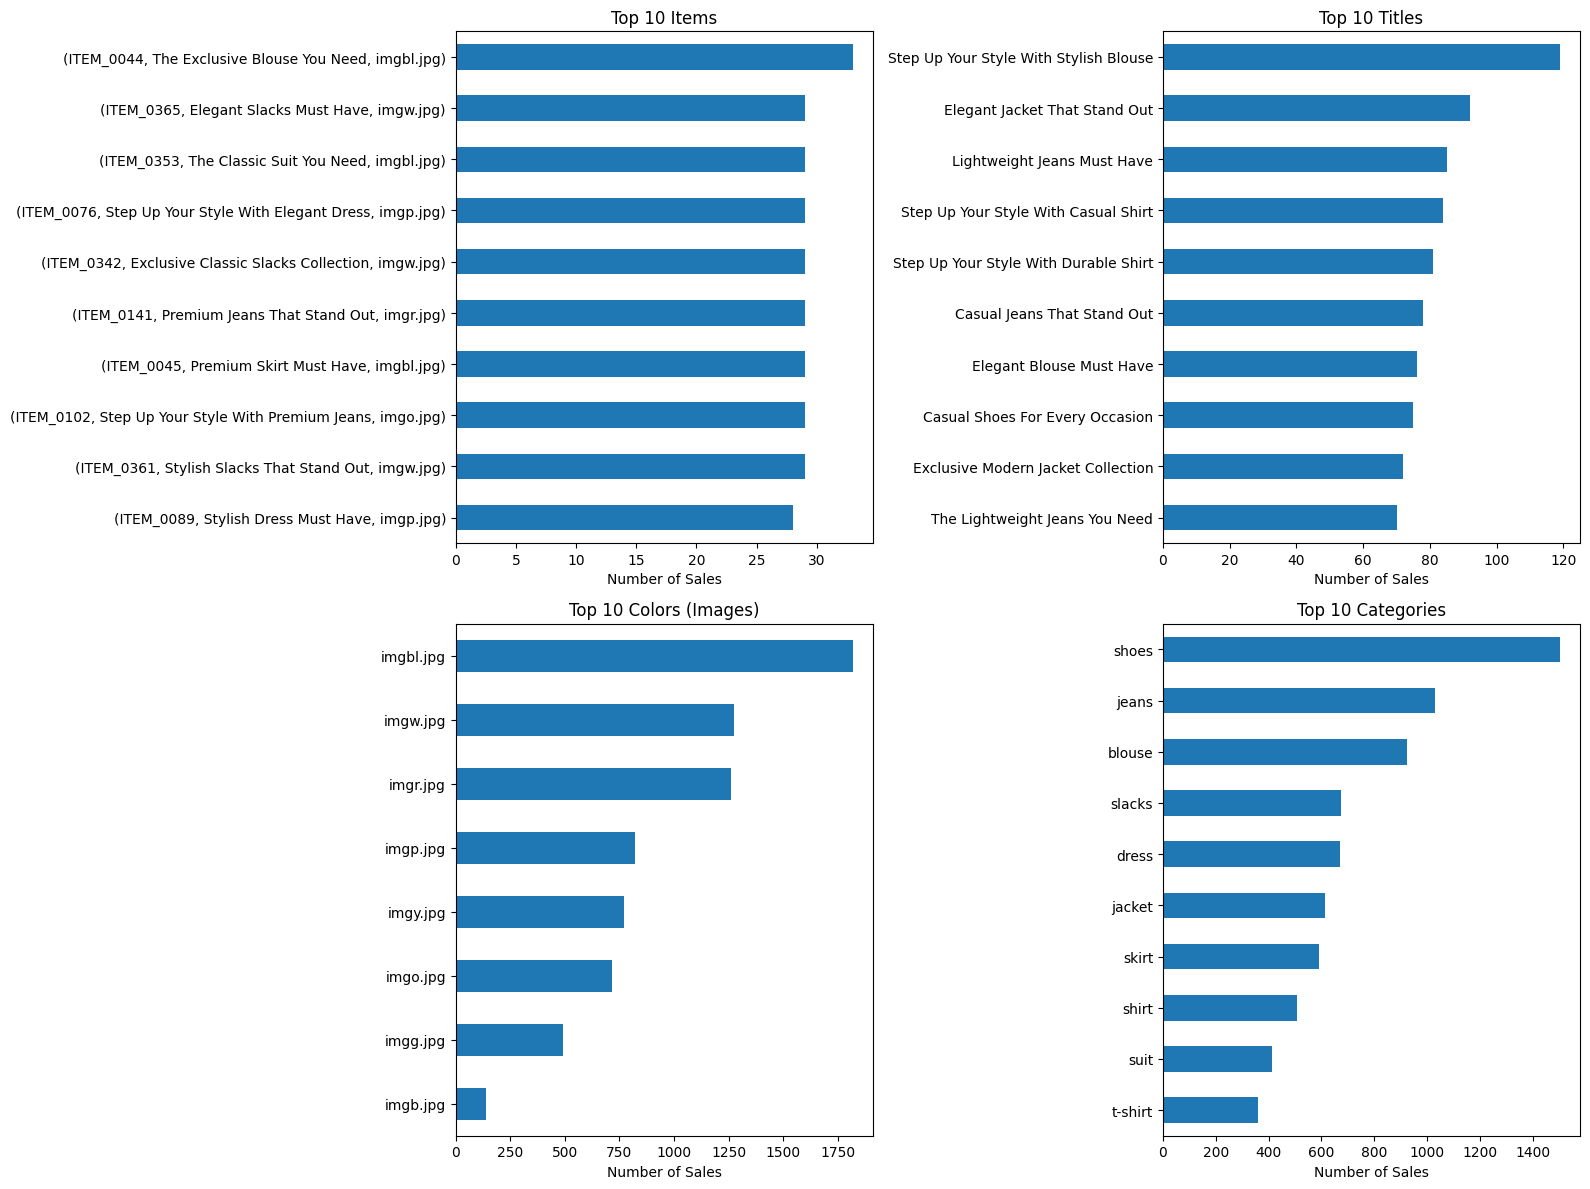

In [ ]:
# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Top-10 datasets
top_10_dict = {
    "Items": (train_df.groupby(["item_id", "item_title", "item_img_filename"])["purchase_id"].count().sort_values(ascending=False).head(10), "Item ID + Title"),
    "Titles": (train_df["item_title"].value_counts().head(10), "Title"),
    "Colors (Images)": (train_df["item_img_filename"].value_counts().head(10), "Image Filename"),
    "Categories": (train_df["item_category"].value_counts().head(10), "Category")
}

# Flatten axes array for easy iteration
axes_flat = axes.flatten()

for ax, (title, (data, ylabel)) in zip(axes_flat, top_10_dict.items()):
    data.plot(kind="barh", ax=ax)
    ax.set_title(f"Top 10 {title}")
    ax.set_xlabel("Number of Sales")
    ax.set_ylabel("")
    # ax.invert_yaxis()  # highest at the top

plt.tight_layout()
plt.show()


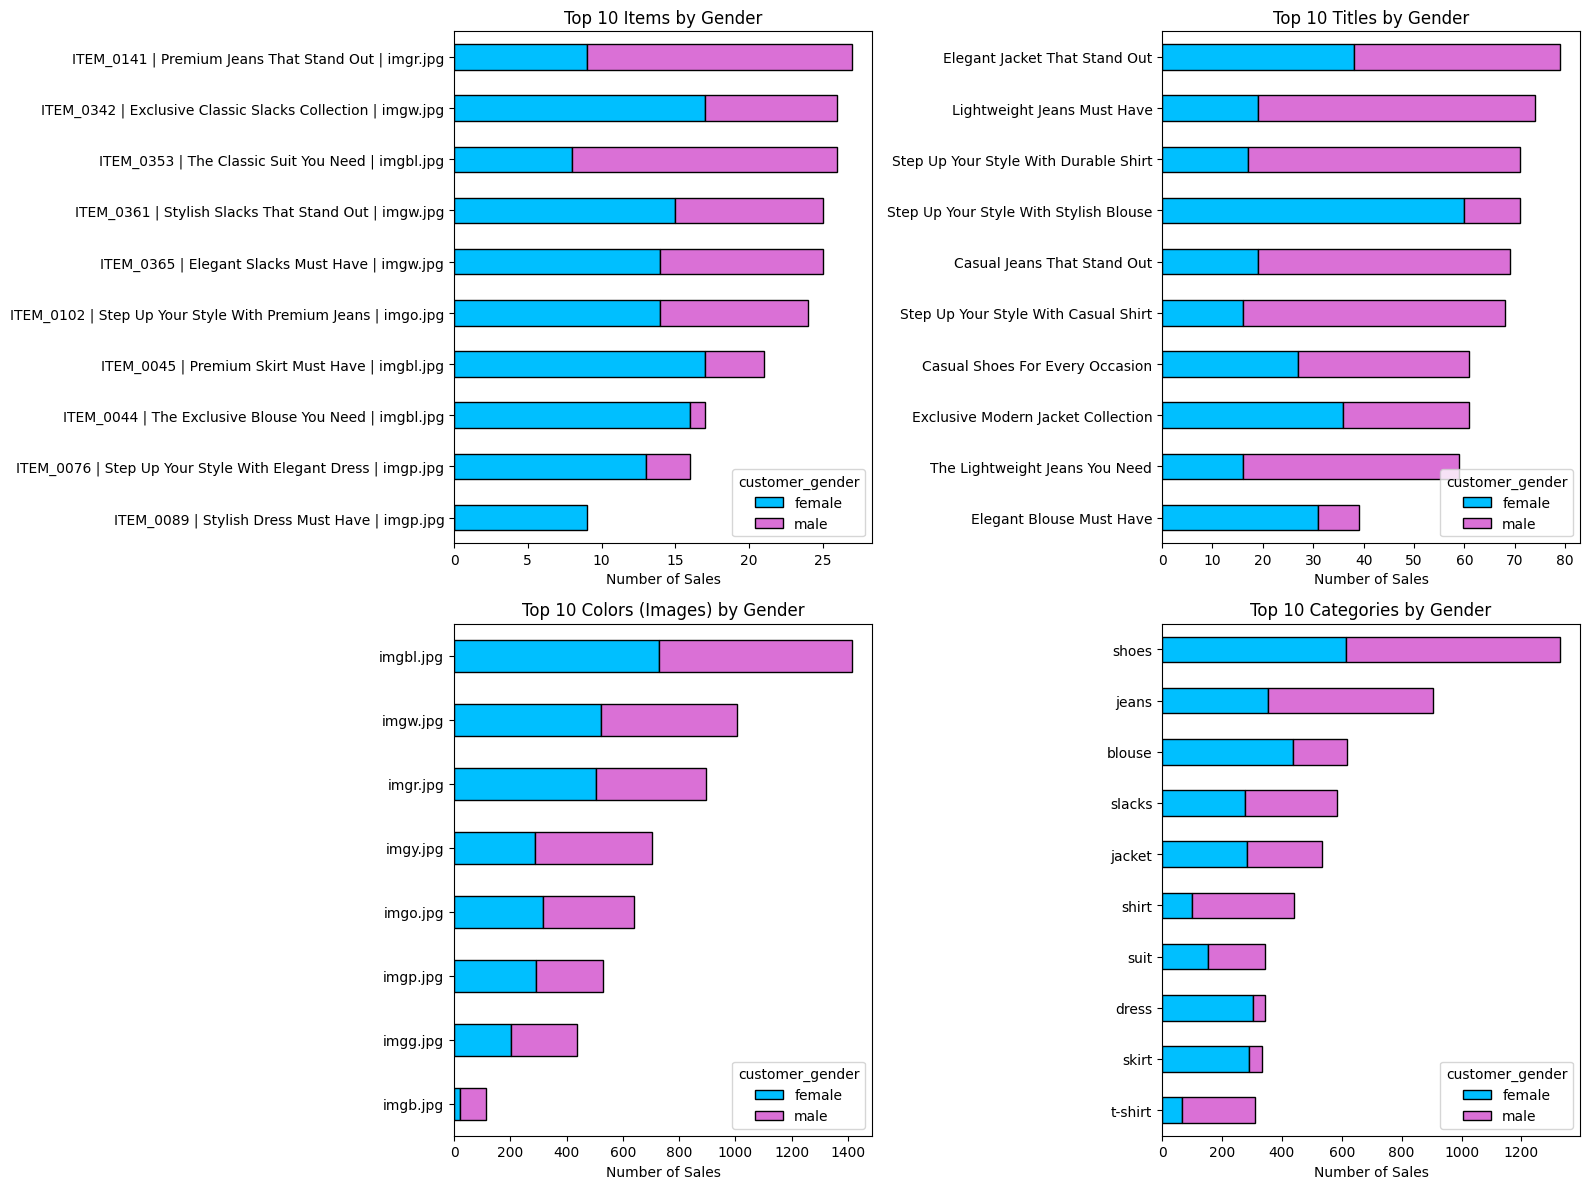

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes_flat = axes.flatten()

# Compute top-10 datasets WITHOUT gender
top_10_dict = {
    "Items": train_df.groupby(["item_id", "item_title", "item_img_filename"])["purchase_id"]
                     .count().sort_values(ascending=False).head(10),
    "Titles": train_df["item_title"].value_counts().head(10),
    "Colors (Images)": train_df["item_img_filename"].value_counts().head(10),
    "Categories": train_df["item_category"].value_counts().head(10)
}

for ax, (title, data) in zip(axes_flat, top_10_dict.items()):
    df_top = train_df.copy()
    
    if title == "Items":
        top_index = data.index
        
        # Convert the tuple to a single string column BEFORE crosstab
        df_top["item_combined_str"] = df_top.apply(
            lambda x: f"{x['item_id']} | {x['item_title']} | {x['item_img_filename']}", axis=1
        )
        
        # Keep only top 10
        df_top = df_top[df_top["item_combined_str"].isin(
            [f"{i} | {t} | {img}" for i, t, img in top_index]
        )]
        
        # Crosstab by gender
        crosstab = pd.crosstab(df_top["item_combined_str"], df_top["customer_gender"])
        
        # Ensure all top 10 rows are present, even if some gender=0
        crosstab = crosstab.reindex(
            [f"{i} | {t} | {img}" for i, t, img in top_index],
            fill_value=0
        )
        
    else:
        col_name = {
            "Titles": "item_title",
            "Colors (Images)": "item_img_filename",
            "Categories": "item_category"
        }[title]
        top_labels = data.index
        crosstab = pd.crosstab(df_top[col_name], df_top["customer_gender"])
        crosstab = crosstab.reindex(top_labels, fill_value=0)
    
    # Sort for horizontal bars (largest total at top)
    crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=True).index]
    
    # Plot
    crosstab.plot(kind="barh", stacked=True, ax=ax, edgecolor="black", color=["deepskyblue","orchid"])
    ax.set_title(f"Top 10 {title} by Gender")
    ax.set_xlabel("Number of Sales")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


Notar que existen compras realizadas después del 25 de septiembre del 2025

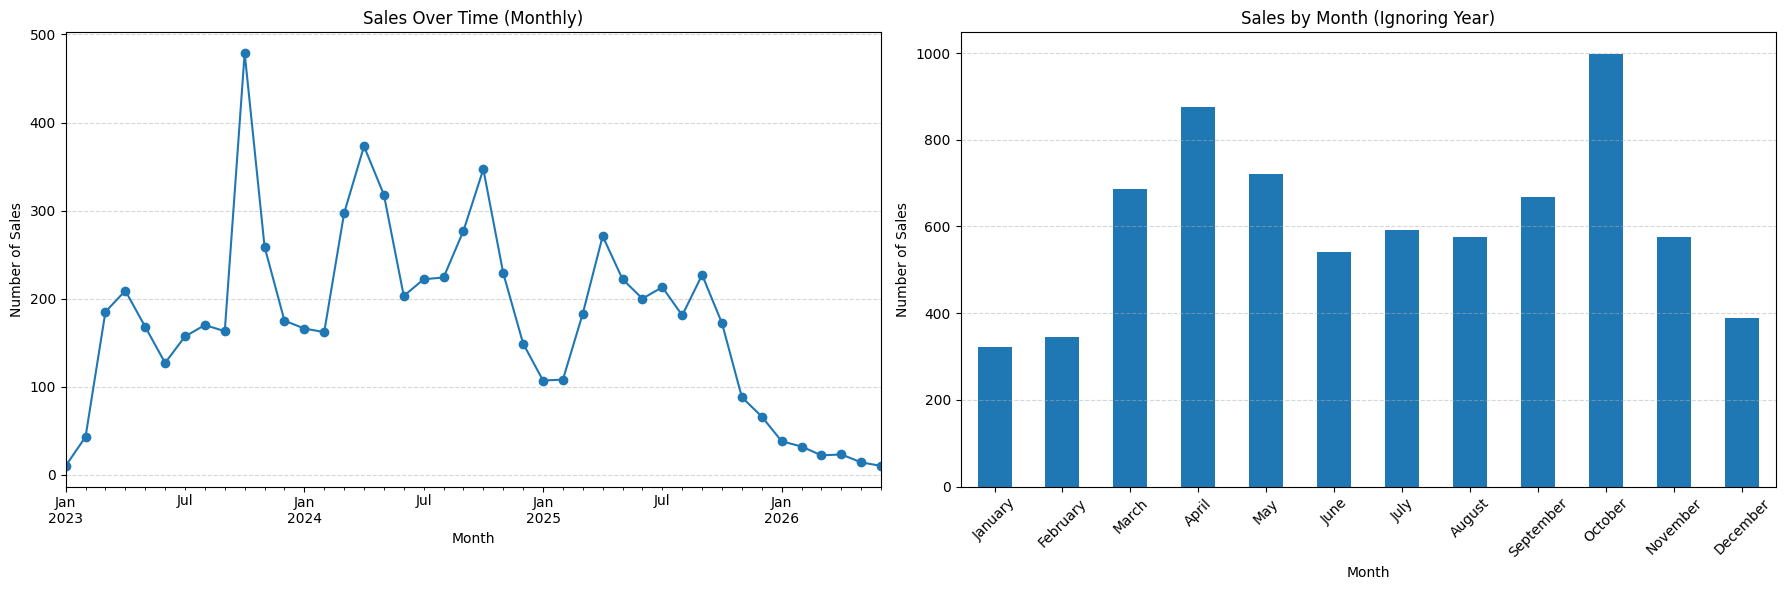

In [25]:
import calendar

# Ensure the timestamp column is datetime
train_df["purchase_timestamp"] = pd.to_datetime(train_df["purchase_timestamp"], errors="coerce")

# --- Sales over time (monthly, including year) ---
sales_over_time = train_df.groupby(train_df["purchase_timestamp"].dt.to_period("M"))["label"].count()

# --- Sales by month (ignoring year) ---
sales_by_month = train_df.groupby(train_df["purchase_timestamp"].dt.month)["label"].count()
sales_by_month.index = [calendar.month_name[m] for m in sales_by_month.index]  # Optional: use month names

# --- Side-by-side plots ---


fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Sales over time
sales_over_time.plot(kind="line", marker="o", ax=axes[0])
axes[0].set_title("Sales Over Time (Monthly)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Sales")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Sales by month (ignoring year)
sales_by_month.plot(kind="bar", ax=axes[1])
axes[1].set_title("Sales by Month (Ignoring Year)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Sales")
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

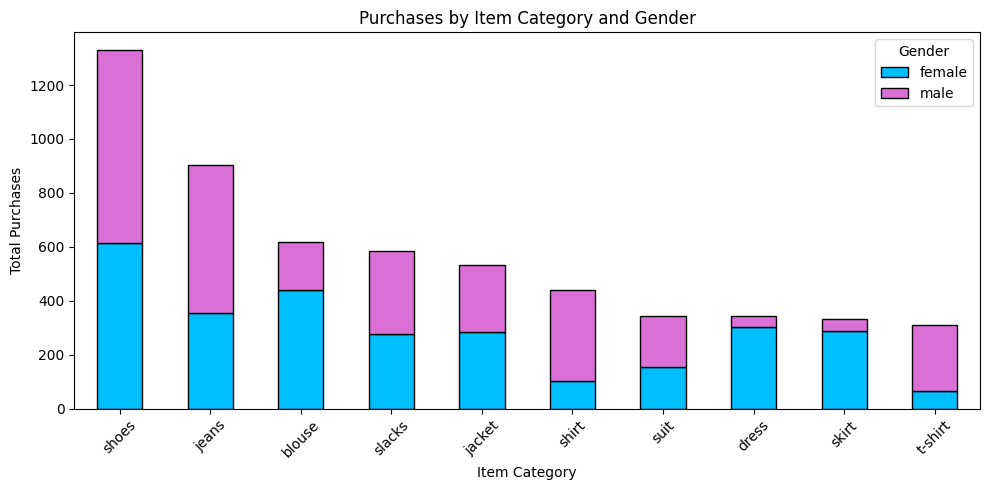

In [43]:
# Compute the crosstab
crosstab = pd.crosstab(df["item_category"], df["customer_gender"])

# Sort categories by total sales (sum across genders)
crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

# Plot using explicit axes
fig, ax = plt.subplots(figsize=(10,5))
crosstab.plot(
    kind="bar", 
    stacked=True, 
    color=["deepskyblue", "orchid"], 
    edgecolor="black", 
    ax=ax
)

ax.set_title("Purchases by Item Category and Gender")
ax.set_xlabel("Item Category")
ax.set_ylabel("Total Purchases")
ax.tick_params(axis="x", rotation=45)
ax.legend(title="Gender")

plt.tight_layout()
plt.show()


---

## Customers

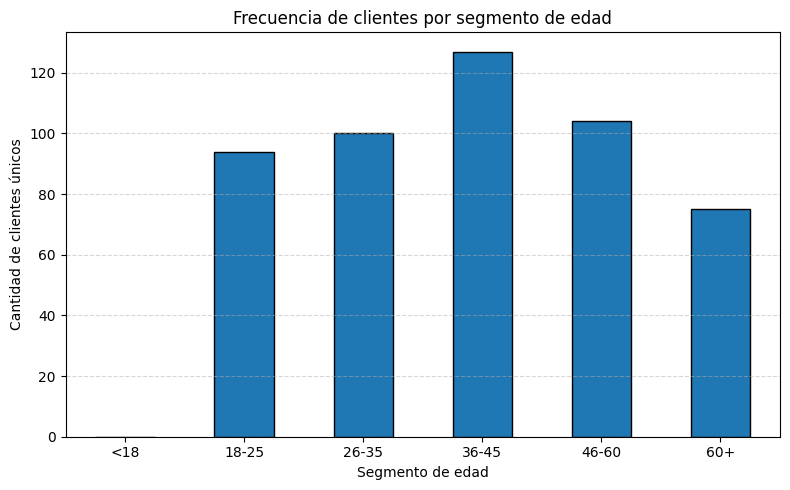

In [30]:
# Calcula la edad si no existe
if "edad" not in train_df.columns:
    today = pd.Timestamp("2025-09-21")
    train_df["customer_date_of_birth"] = pd.to_datetime(train_df["customer_date_of_birth"], errors="coerce")
    train_df["edad"] = (today - train_df["customer_date_of_birth"]).dt.days // 365

# Define los segmentos de edad
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-60", "60+"]

train_df["segmento_edad"] = pd.cut(train_df["edad"], bins=bins, labels=labels, right=False)

# Grafica la frecuencia de clientes por segmento de edad
plt.figure(figsize=(8,5))
train_df.drop_duplicates("customer_id")["segmento_edad"].value_counts(sort=False).plot(
    kind="bar", edgecolor="black"
)
plt.title("Frecuencia de clientes por segmento de edad")
plt.xlabel("Segmento de edad")
plt.ylabel("Cantidad de clientes únicos")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

    segmento_edad                              item_title  purchase_id
39          18-25  Step Up Your Style With Stylish Blouse           65
140         26-35  Step Up Your Style With Stylish Blouse           41
234         36-45    Step Up Your Style With Casual Shirt           60
297         46-60           Elegant Jacket That Stand Out           75
458           60+              The Premium Shoes You Need           45


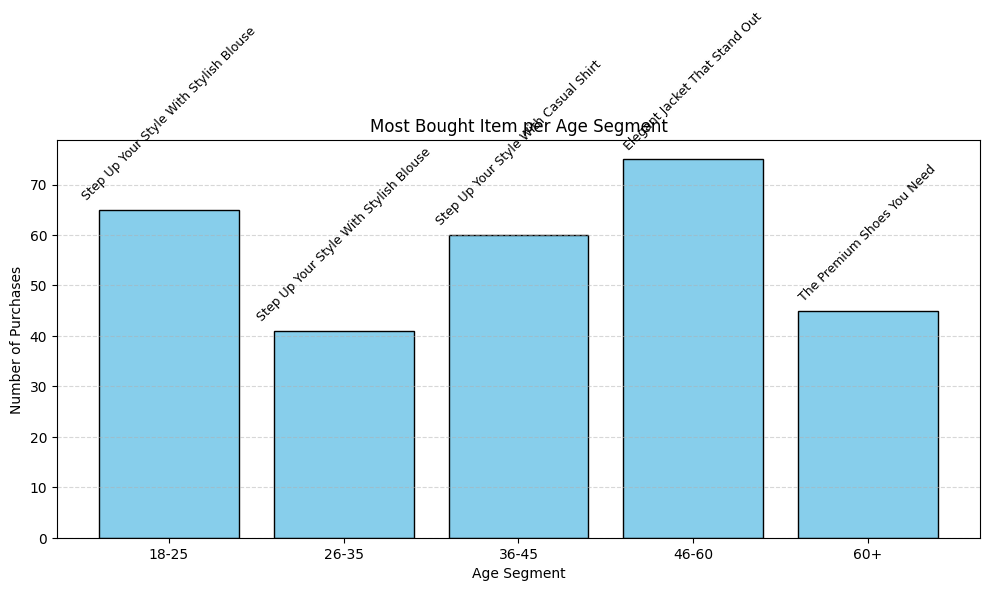

In [ ]:
# Most bought article per age segment
most_bought_per_segment = (
    train_df.groupby(["segmento_edad", "item_title"], observed=True)["purchase_id"]
    .count()
    .reset_index()
)

# For each segment, get the item with the max purchases
most_bought_per_segment = most_bought_per_segment.loc[
    most_bought_per_segment.groupby("segmento_edad", observed=True)["purchase_id"].idxmax()
].sort_values("segmento_edad")

#print(most_bought_per_segment)

plt.figure(figsize=(10,6))
plt.bar(most_bought_per_segment["segmento_edad"],
        most_bought_per_segment["purchase_id"], 
        edgecolor="black", color="skyblue")

# Add item names as labels on top
for i, row in most_bought_per_segment.iterrows():
    plt.text(row["segmento_edad"], row["purchase_id"]+2, row["item_title"], 
             ha="center", rotation=45, fontsize=9)

plt.title("Most Bought Item per Age Segment")
plt.xlabel("Age Segment")
plt.ylabel("Number of Purchases")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



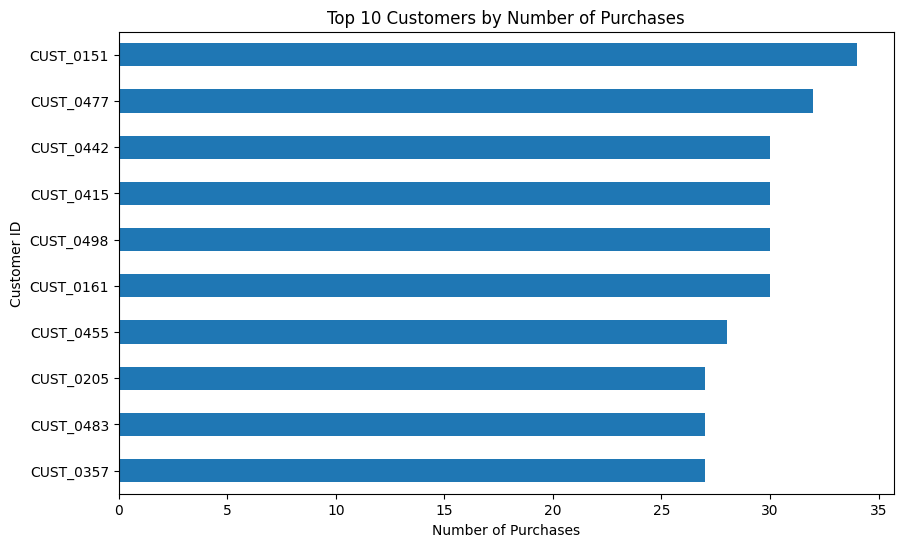

In [33]:
# Top 10 customers with the most purchases
top_customers = (
    train_df.groupby("customer_id")["purchase_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
top_customers.plot(
    kind="barh", 
    figsize=(10,6)
)
plt.title("Top 10 Customers by Number of Purchases")
plt.xlabel("Number of Purchases")
plt.ylabel("Customer ID")
plt.gca().invert_yaxis()  # highest at the top
plt.show()


UNIVARIATE ANALYSES

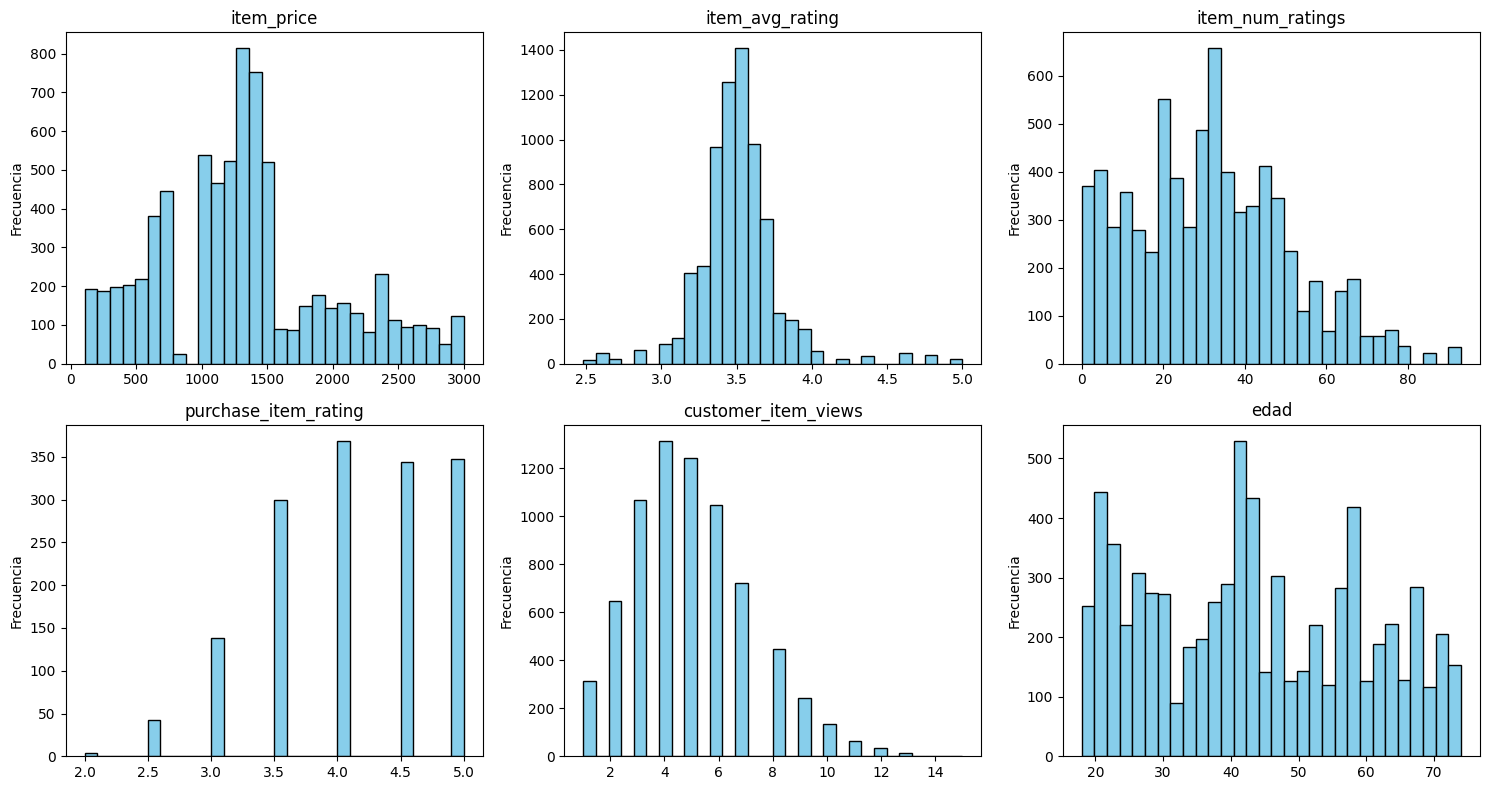

In [ ]:
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas/categóricas que quieres graficar
cols = [    
    "item_price", "item_avg_rating", "item_num_ratings", "purchase_item_rating", 
    "customer_item_views", "edad"
]

# Calcula la edad si no existe
if "edad" not in train_df.columns:
    today = pd.Timestamp("2025-09-21")
    train_df["customer_date_of_birth"] = pd.to_datetime(train_df["customer_date_of_birth"], errors="coerce")
    train_df["edad"] = (today - train_df["customer_date_of_birth"]).dt.days // 365

# Número de columnas y filas para la cuadrícula
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    train_df[col].dropna().plot(kind="hist", bins=30, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Elimina ejes vacíos si hay (Recorre los subplots que no se usaron. Los elimina para que no aparezcan cuadros vacíos en la figura final.)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()